In [ ]:
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv('/content/Credit.csv')

In [44]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
1   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
2  4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
3  6986 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
4  7519  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211  0.320198  0.044519   
1 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966 -0.293803  0.279798   
2 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726 -0.087330 -0.156114   
3 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207 -0.053502  0.252405   
4 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805 -1.632653  1.488901   

        V26       V27       V28 

In [45]:
len(data)

1208

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-47-94e0c4ced588>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


NameError: name 'LABELS' is not defined

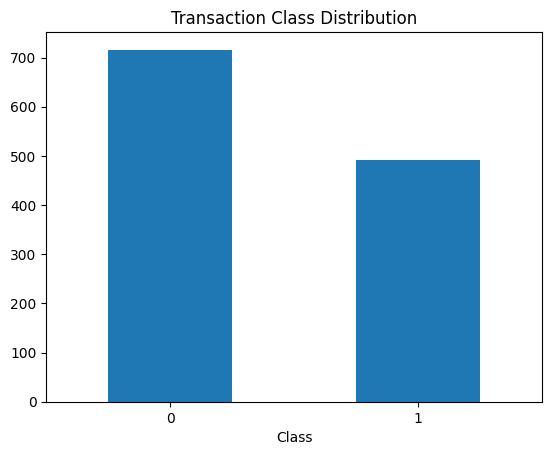

In [47]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [48]:
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

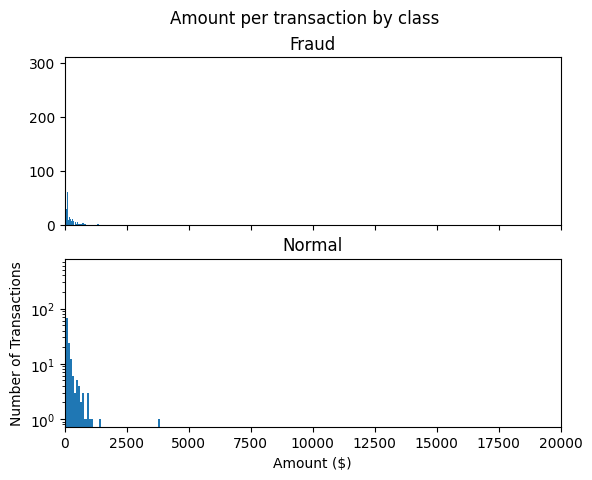

In [49]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [50]:
y = data['Class']
X = data.drop('Class', axis=1)


In [51]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
rf=RandomForestClassifier(n_estimators=3)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3)

In [54]:
y_pred=rf.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       109

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

